In [ ]:
import h5py
import tensorflow
import numpy
import keras
import cv2
import sklearn
import matplotlib

In [ ]:
#%pylab inline
import os, sys, random
import xml.etree.ElementTree as ET
from glob import glob
import pandas as pd
from shutil import copyfile

annotations = glob("C:/Users/Gaurav/Desktop/Test/BCCD_Dataset-master/BCCD_Dataset-master/BCCD/Annotations/*.xml")

df = []
cnt = 0
for file in annotations:
    prev_filename = file.split('/')[-1].split('.')[0] + '.jpg'
    image_names = str(prev_filename[-20:]) # + '.jpg'
    row = []
    parsedXML = ET.parse(file)
    for node in parsedXML.getroot().iter('object'):
        blood_cells = node.find('name').text
        xmin = int(node.find('bndbox/xmin').text)
        xmax = int(node.find('bndbox/xmax').text)
        ymin = int(node.find('bndbox/ymin').text)
        ymax = int(node.find('bndbox/ymax').text)

        row = [image_names, blood_cells, xmin, xmax,
        ymin, ymax]
        df.append(row)
        cnt += 1
        data = pd.DataFrame(df, columns=['image_names', 'cell_type',
        'xmin', 'xmax', 'ymin', 'ymax'])
        data[['image_names', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax']]

In [ ]:
data.head()

In [ ]:
data.to_csv("C:/Users/Gaurav/Desktop/Cars/region_final.csv")

In [32]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

In [33]:
# read the csv file using read_csv function of pandas
train = pd.read_csv("C:/Users/Gaurav/Desktop/Cars/region_final.csv")
train.head()

,image_names,defect,xmin,ymin,xmax,ymax
0,1.jpg,Front Bumper,58,266,474,462
1,2.jpg,Front Bumper,5,248,328,474
2,3.jpg,Rear Bumper,18,286,382,459
3,4.jpg,Front Bumper,244,254,601,460
4,5.jpg,Rear Bumper,50,258,401,471


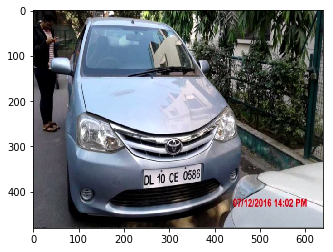

In [34]:
# reading single image using imread function of matplotlib
image = plt.imread("C:/Users/Gaurav/Desktop/Cars/train_images/1.jpg")
plt.imshow(image)

In [35]:
# Number of unique training images
train['image_names'].nunique()

100

In [37]:
# Number of classes
train['defect'].value_counts()

Rear Bumper     51
Front Bumper    49
Name: defect, dtype: int64

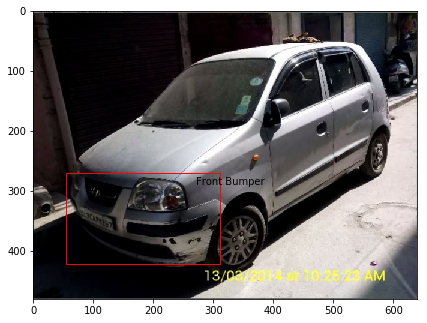

In [45]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread("C:/Users/Gaurav/Desktop/Cars/train_images/65.jpg")
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train.image_names == "65.jpg"].iterrows():
    xmin = row.xmin
    ymin = row.ymin
    
    xmax = row.xmax
    ymax = row.ymax

    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.defect == 'Front Bumper':
        edgecolor = 'r'
        ax.annotate('Front Bumper', xy=(xmax-40,ymin+20))
    elif row.defect == 'Rear Bumper':
        edgecolor = 'b'
        ax.annotate('Rear Bumper', xy=(xmax-40,ymin+20))
    #elif row.cell_type == 'Platelets':
    #    edgecolor = 'g'
    #    ax.annotate('Platelets', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

In [47]:
data = pd.DataFrame()
data['format'] = train['image_names']

# as the images are in train_images folder, add train_images before the image name
for i in range(data.shape[0]):
    data['format'][i] = 'train_images/' + data['format'][i]

# add xmin, ymin, xmax, ymax and class as per the format required
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str(train['xmin'][i]) + ',' + str(train['ymin'][i]) + ',' + str(train['xmax'][i]) + ',' + str(train['ymax'][i]) + ',' + train['defect'][i]

data.to_csv("C:/Users/Gaurav/Desktop/Cars/annotate.txt", header=None, index=None, sep=' ')